In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200
os.makedirs('charts', exist_ok=True)   # folder to save charts

**Load the CSV**

In [ ]:
DATA_FILENAME = 'kaggle_survey_2017_2021.csv'  # <- change if needed

def load_csv(fn):
    try:
        return pd.read_csv(fn, low_memory=False)
    except UnicodeDecodeError:
        return pd.read_csv(fn, low_memory=False, encoding='latin1')
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {fn}. Upload it or set DATA_FILENAME correctly.")

df = load_csv(DATA_FILENAME)
print('shape:', df.shape)
df.head(3)

shape: (106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_16,Q10_OTHER,Q11,Q12new,Q12_Part_1,Q12_Part_2,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,...,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_11,Q32_B_Part_13,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Wh

**Quick inspection**

In [ ]:
# columns, basic info, and top missing counts
print('Columns:', list(df.columns)[:80])
df.info()
print('\nTop missing counts:')
print(df.isna().sum().sort_values(ascending=False).head(20))

Columns: ['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_12', 'Q9_OTHER', 'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_16', 'Q10_OTHER', 'Q11', 'Q12new', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_5', 'Q12_OTHER', 'Q13', 'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5', 'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10', 'Q14_Part_11', 'Q14_OTHER', 'Q15', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part

**Clean column names**

In [ ]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace(r'[^0-9a-z_]', '', regex=True))
print('Clean column names example:', list(df.columns)[:30])


Clean column names example: ['', 'time_from_start_to_finish_seconds', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7_part_1', 'q7_part_2', 'q7_part_3', 'q7_part_4', 'q7_part_5', 'q7_part_6', 'q7_part_7', 'q7_part_8', 'q7_part_9', 'q7_part_10', 'q7_part_11', 'q7_part_12', 'q7_other', 'q8', 'q9_part_1', 'q9_part_2', 'q9_part_3', 'q9_part_5', 'q9_part_6', 'q9_part_7', 'q9_part_8', 'q9_part_9']


**Drop exact duplicates**

In [ ]:
before = len(df)
df = df.drop_duplicates().reset_index(drop=True)
after = len(df)
print('Dropped rows:', before - after, '| New shape:', df.shape)

Dropped rows: 4456 | New shape: (101846, 293)


**Trim strings and normalize missing values**

In [ ]:
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip().replace({'nan':'', 'n/a':'', 'na':'', 'none':'', 'None':''})
    # convert empty strings to real NaN
    df[c] = df[c].replace('', np.nan)

# Fill categorical NA with 'Unknown' (you can change per-column later)
cat_cols = df.select_dtypes(include='object').columns.tolist()
df[cat_cols] = df[cat_cols].fillna('Unknown')

print('Done trimming and filling categorical NAs.')

Done trimming and filling categorical NAs.


**Convert numeric-like columns automatically (safe heuristic)**

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        # try to parse numbers by removing commas
        tmp = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
        if tmp.notna().sum() / max(1, len(tmp)) > 0.6:   # >60% numeric-like
            df[col] = tmp
            print('Converted to numeric:', col)

Converted to numeric: 
Converted to numeric: time_from_start_to_finish_seconds


**Multi-response column: count top tokens (example: programming languages)**

In [ ]:
col = 'programming_languages'   # change to real column name if needed
if col in df.columns:
    # split on common separators and explode
    toks = (df[col].dropna().astype(str)
            .str.split('[,;|]', expand=False)
            .explode()
            .str.strip()
            .replace('', np.nan)
            .dropna())
    top_langs = toks.value_counts().head(15)
    print('Top programming languages (sample):')
    print(top_langs)
else:
    print(col, 'not found in dataset — skip this step or change column name.')

programming_languages not found in dataset — skip this step or change column name.


**Label encode / factorize useful categorical columns**

In [ ]:
for c in ['country','education','job_title','employment_status']:
    if c in df.columns:
        df[c + '_code'] = pd.factorize(df[c].astype(str))[0]
        print('Factorized:', c, '->', c + '_code')


** Derived columns: age groups & experience bands**

In [ ]:
# Age group (if numeric age exists)
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    bins = [0,18,24,34,44,54,64,120]
    labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    print('Created age_group.')

# Experience: try some common column names (change if your dataset uses different name)
possible = ['years_coding', 'years_experience', 'years_programming', 'yrs_experience']
exp_col = next((c for c in possible if c in df.columns), None)
if exp_col:
    df['exp_years'] = pd.to_numeric(df[exp_col], errors='coerce')
    bins = [0,2,5,10,20,100]
    labels = ['0-2','3-5','6-10','11-20','20+']
    df['exp_band'] = pd.cut(df['exp_years'], bins=bins, labels=labels)
    print('Created exp_band from', exp_col)
else:
    print('No common experience column found; skip exp_band or change names.')

No common experience column found; skip exp_band or change names.


**Quick helper to print top-n categories**

In [ ]:
def top_n(col, n=10):
    if col in df.columns:
        print(df[col].value_counts().head(n))
    else:
        print(col, 'not in dataframe.')

# Examples:
top_n('country', 10)
top_n('education', 10)
top_n('job_title', 10)

country not in dataframe.
education not in dataframe.
job_title not in dataframe.


**Example analysis: median salary by experience (if salary exists)**

In [ ]:
if 'salary' in df.columns and 'exp_band' in df.columns:
    med = df.groupby('exp_band')['salary'].median().dropna()
    print('Median salary by experience band:')
    print(med)
else:
    print('salary or exp_band not available — skip this step.')

salary or exp_band not available — skip this step.


**Plot & save chart (one chart per cell)**

Example: Top 10 countries chart

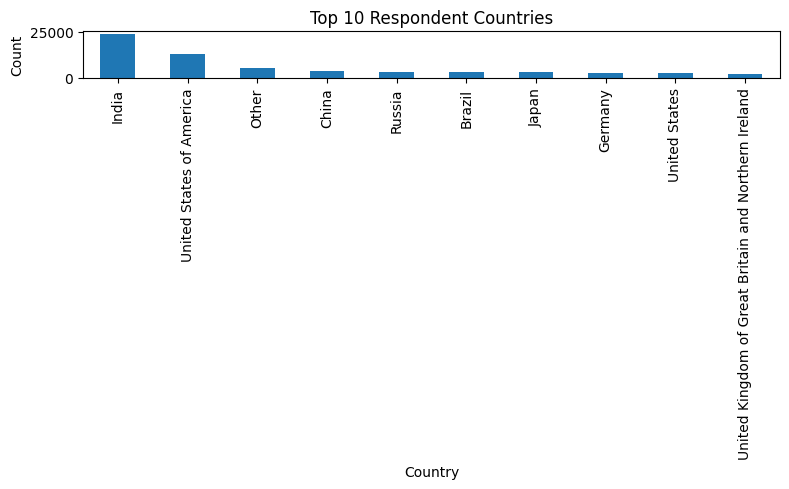

In [ ]:
plt.figure(figsize=(8,5))
df['q3'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Respondent Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('charts/top10_countries.png', dpi=150)
plt.show()

Example: Top programming languages (from Step 8)

In [ ]:
if 'top_langs' in locals():
    plt.figure(figsize=(8,5))
    top_langs.head(10).plot(kind='bar')
    plt.title('Top Programming Languages')
    plt.xlabel('Language')
    plt.ylabel('Mentions')
    plt.tight_layout()
    plt.savefig('charts/top_languages.png', dpi=150)
    plt.show()


Example: Experience band distribution

In [ ]:
if 'exp_band' in df.columns:
    plt.figure(figsize=(6,4))
    df['exp_band'].value_counts().sort_index().plot(kind='bar')
    plt.title('Experience Band Distribution')
    plt.xlabel('Experience Band')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('charts/exp_band.png', dpi=150)
    plt.show()